In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
!pip install statsmodels
!pip install sklearn

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

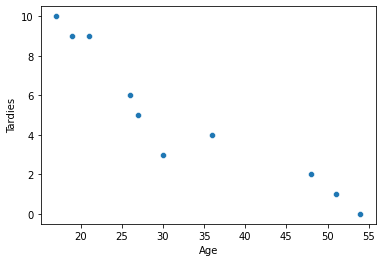

In [4]:
# Your code here.
sns.scatterplot(x= student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Response here. 
There is a trend that confirms, the younger the student the less puntual it is.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


There is a strong negative covariance between Age and Tardies, so the older the person the less late.

In [6]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

optimal_m = lr.fit(X = student_data[["Age"]], y = student_data.Tardies).coef_[0]
optimal_n = lr.fit(X = student_data[["Age"]], y = student_data.Tardies).intercept_

student_data["prediction"] = student_data.Age * optimal_m + optimal_n
student_data.head()

,Age,Tardies,prediction
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256


Plot your regression model on your scatter plot.

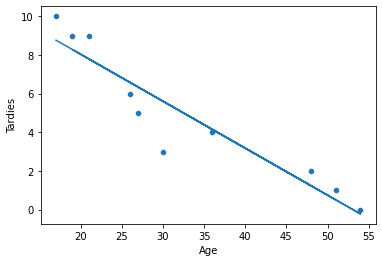

In [9]:
# Your code here.
fig, ax = plt.subplots(1,1)

sns.scatterplot(x=student_data.Age, y=student_data.Tardies, ax=ax)

ax.plot(student_data.Age, student_data.prediction);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
student_data["error"] = student_data.Tardies - student_data.prediction
student_data.head()

,Age,Tardies,prediction,error
0,17,10,8.760850,1.239150
1,51,1,0.504944,0.495056
2,27,5,6.332643,-1.332643
3,21,9,7.789567,1.210433
4,36,4,4.147256,-0.147256


In [11]:
# Your response here.
student_data.error.mean()

1.7763568394002506e-16

The model has a small error, so we can use it to predict the tardiness of students based on their age.
It is clear that there is a realtionship between tardiness and correlation.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("./vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [13]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
vehicles.drop(['Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG', 'Engine Displacement'],
  axis='columns', inplace=True)

In [15]:
vehicles.head()

,Make,Model,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,4.0,19.388824,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,6.0,25.354615,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,4.0,20.600625,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,GNX,1987,6.0,20.600625,16,555.437500,2550


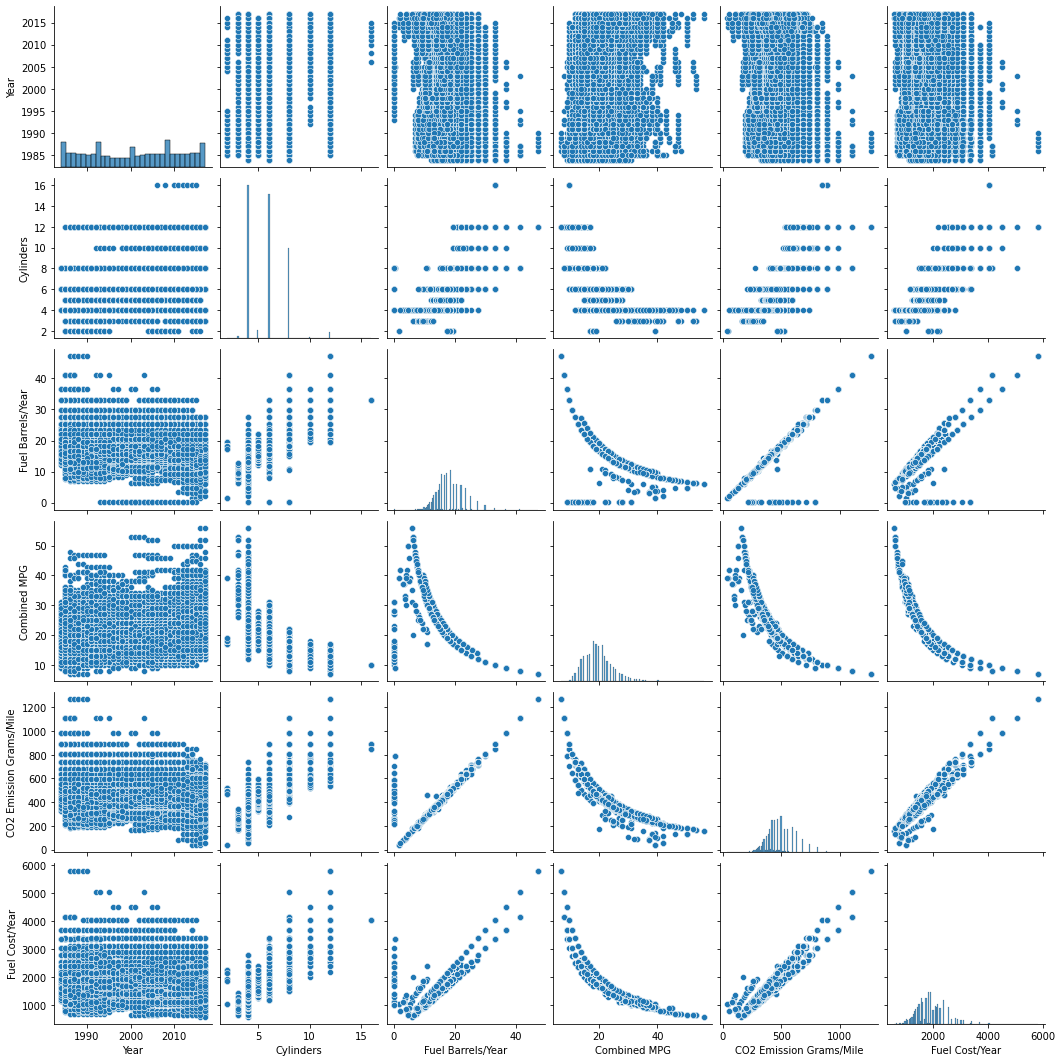

In [16]:
sns.pairplot(vehicles);

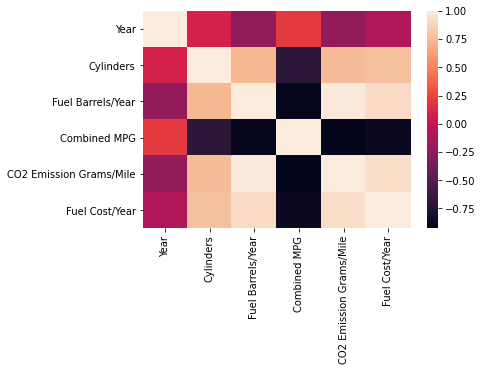

In [17]:
sns.heatmap(vehicles.corr());

In [27]:
vehicles.rename(columns = {'CO2 Emission Grams/Mile' : 'CO2_Emission_Grams_per_Mile', 'Fuel Barrels/Year' : 'Fuel_Barrels_per_Year', 'Fuel Cost/Year' : 'Fuel_Cost_per_Year', 'Combined MPG' : 'Combined_MPG'}, inplace = True)
vehicles.head()

,Make,Model,Year,Cylinders,Fuel_Barrels_per_Year,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
0,AM General,DJ Po Vehicle 2WD,1984,4.0,19.388824,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,6.0,25.354615,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,4.0,20.600625,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,GNX,1987,6.0,20.600625,16,555.437500,2550


In [33]:
We can conclede from all the data above that Years is the variable that less information gives for the CO2 emmisions and fuel barrels per year. 

SyntaxError: invalid syntax (<ipython-input-33-c16348faeab0>, line 1)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [32]:
# Your response here. 
results = smf.ols(" CO2_Emission_Grams_per_Mile ~ Year + Cylinders + Fuel_Barrels_per_Year + Combined_MPG + Fuel_Cost_per_Year ", data=vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 3.687e+05
Date:                         Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                                 18:31:59   Log-Likelihood:            -1.5173e+05
No. Observations:                        35952   AIC:                         3.035e+05
Df Residuals:                            35946   BIC:                         3.035e+05
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               769.8883     19.392     39.702      0.000     731.880     807.897
Year                     -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                 1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_per_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG             -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_per_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
There is a high correlation with the variables we have used. A 98,1% of the value of CO2 Emmisions can be explained with the variables we have.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 